### Import libraries

In [7]:
import pandas as pd
import pandas_datareader as pdr

import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline
matplotlib.rc('font', **{'size': 12})

### Pull price data for our Solar Energy proxy

In [8]:
start = '01-01-2017'
end = '01-01-2022'

tickers = ['TAN', 'SPY', 'URTH']

prices = pdr.DataReader(tickers, 'yahoo', start=start, end=end)
prices = prices['Close']

prices

Symbols,TAN,SPY,URTH
Date,,,
2017-01-03,16.959999,225.240005,73.760002
2017-01-04,17.350000,226.580002,74.389999
2017-01-05,17.459999,226.399994,74.639999
2017-01-06,17.400000,227.210007,74.790001
2017-01-09,17.459999,226.460007,74.419998
...,...,...,...
2021-12-27,77.180000,477.260010,135.960007
2021-12-28,76.000000,476.869995,135.820007
2021-12-29,75.459999,477.480011,135.910004


### Calculate daily returns

In [9]:
returns = prices.pct_change(1)
returns = np.exp(np.log1p(returns.cumsum()))
returns *= 100

<AxesSubplot:xlabel='Date', ylabel='TAN'>

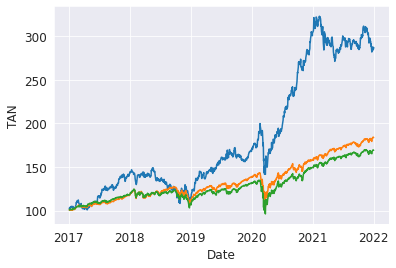

In [10]:
sns.lineplot(x=returns.index, y=returns['TAN'])
sns.lineplot(x=returns.index, y=returns['SPY'])
sns.lineplot(x=returns.index, y=returns['URTH'])

In [11]:
returns.to_csv('./solar_energy_returns_vs_market.csv')